# Finanças UFRN

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
works = pd.read_csv("res/obras.csv", sep=';')
works_request = pd.read_csv("res/requisicaoobras.csv", sep=';')

print(works.head())
works_request.head()


   id_obra                                          descricao  \
0      493  CONSTRUÇÃO DO BLOCO H DO SETOR DE AULAS TEÓRIC...   
1      521  CONSTRUÇÃO DO BLOCO A1 DO SETOR DE AULAS TEÓRI...   
2      848  CONSTRUÇÃO DO SETOR DE ANTIBIÓTICOS PRODUÇÃO D...   
3      925  Complementação da 2ª Etapa e Realização da 3ª ...   
4      182   CONSTRUÇÃO DO DEPARTAMENTO DE FISIOTERAPIA - CCS   

                   periodo  qtd_dias status_obra licitacao  \
0  23/03/2005 - 19/11/2005       240  FINALIZADA    6/2004   
1  04/05/2005 - 30/12/2005       240  FINALIZADA    7/2004   
2  02/06/2005 - 29/01/2006       240  FINALIZADA    4/2004   
3  28/01/2005 - 22/01/2006       360  FINALIZADA    2/2004   
4  08/02/2006 - 02/02/2007       360  FINALIZADA    1/2005   

                                             empresa    modalidade  \
0   03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...  CONCORRÊNCIA   
1   03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...  CONCORRÊNCIA   
2        03.722.669/0001-8

,numero,ano,id_unidade_requisitante,nome_unidade_requisitante,id_unidade_custo,nome_unidade_custo,data_envio,descricao,local,observacoes,status,processo
0,1467,2018,445,CENTRO DE TECNOLOGIA,445,CENTRO DE TECNOLOGIA,27/02/2018,REPARO DO FORRO E RECUPERAÇÃO DE PEÇAS METÁLIC...,CENTRO DE TECNOLOGIA - UFRN,"RDC 01/2018 - R$ 40.984,69",CADASTRADA,NaN
1,1463,2018,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,27/02/2018,RECUPERAÇÃO ESTRUTURAL DA COBERTURA DO PRÉDIO ...,CENTRO DE TECNOLOGIA-UFRN,"RDC 01/2018 - R$ 136.974,42",PENDENTE AUTORIZAÇÃO CHEFE UNIDADE,NaN
2,1388,2018,6919,INSTITUTO DE MEDICINA TROPICAL - IMT-RN,6919,INSTITUTO DE MEDICINA TROPICAL - IMT-RN,23/02/2018,Projeto de sinalização interna e externa do IM...,"Unidade clínica do IMT-RN, ao lado do HGT.",NaN,AUTORIZADA PARA INFRA,NaN
3,1340,2018,3362,ASSESSORIA ADMINISTRATIVA (AS/CT),87,DIREÇÃO DO CENTRO DE TECNOLOGIA,23/02/2018,Conforme parecer técnico realizado pela coorde...,Complexo tecnológico de engenharia (CTEC),Construção de um abrigo para fins de destinaçã...,AUTORIZADA PARA INFRA,NaN
4,927,2018,196,DEPARTAMENTO DE FARMACIA,196,DEPARTAMENTO DE FARMACIA,08/02/2018,DIANTE DA CRIAÇÃO DA PRIMEIRA E ÚNICA EMPRESA ...,LOCAL SE TRATA DE PARTE DA ANTIGA PRAÇA DO XAR...,UNIDADE DE CUSTO CCS.,CADASTRADA,NaN


In [47]:
# This cell clears the dataset of all unlabeled data

valid_indexes = []
for i,_ in enumerate(works['unidade_responsavel'].isnull()):
    if (_ == False ):
        valid_indexes.append(i)
works_filter = works.loc[valid_indexes]
pd.DataFrame(works_filter.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 2 to 602
Data columns (total 15 columns):
id_obra                   473 non-null int64
descricao                 473 non-null object
periodo                   473 non-null object
qtd_dias                  473 non-null int64
status_obra               473 non-null object
licitacao                 473 non-null object
empresa                   473 non-null object
modalidade                473 non-null object
valor                     473 non-null object
fonte_recurso             372 non-null object
vigencia_projeto          262 non-null object
projeto                   262 non-null object
id_unidade_responsavel    473 non-null float64
unidade_responsavel       473 non-null object
Unnamed: 14               0 non-null float64
dtypes: float64(2), int64(2), object(11)
memory usage: 59.1+ KB


""


In [48]:
# University's departments with most finished building  biddings
pd.DataFrame(works_filter['unidade_responsavel'].value_counts()).head()

,unidade_responsavel
UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,108
CENTRO DE TECNOLOGIA,38
CENTRO DE BIOCIÊNCIAS,27
CENTRO DE CIÊNCIAS EXATAS E DA TERRA,26
CENTRO DE CIÊNCIAS DA SAÚDE,21


In [49]:
df = works_filter.copy()
for index,i in enumerate(df['valor']):
    i = i.replace(" ", "")
    i = i.replace("R$", "")
    i = i.replace(".","")
    i = i.replace(",", "")
    i = int(i)
    df['valor'][index] = i


/home/cyborg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
dep_names = df['unidade_responsavel'].value_counts().index.tolist()
pd.DataFrame(works_filter['unidade_responsavel']).head()

,unidade_responsavel
2,NUCLEO DE PESQUISA EM ALIMENTOS E MEDICAMENTOS
3,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES
4,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES
6,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES
7,CENTRO DE BIOCIÊNCIAS


In [51]:
#pivot = works_filter.pivot_table(values = works_filter['valor'],index = works_filter['unidade_responsavel'], aggfunc = np.mean)
#print(pivot)

values = {}
for i in dep_names:
    values[i] = 0
    
for index,row in df.iterrows():
#     pd.DataFrame(row['unidade_responsavel'])
#     print(row['unidade_responsavel'])
    i = row['valor'].replace(" ", "")
    i = i.replace("R$", "")
    i = i.replace(".","")
    i = i.replace(",", "")
    i = int(i)
    #print(i)
    #print(row['valor'])
    values[row['unidade_responsavel']] += i

In [78]:
dep_names

82


In [72]:
#for i in values.keys():
   # if (values[i] == values.items().max()):#
#    print (i,values.items()
top11 = {}
## os 6 maiores incluindo o campus do cerebro
big_resources = sorted(values, key=values.get, reverse=True)[:11]
for i in big_resources:
    top11[i] = values[i]
          
print (top11)
#pd.DataFrame(top6)
campus_cerebro = list(top11.keys())[0]
CT = list(top11.keys())[1]
def without_keys(d, keys):
    return {k: v for k, v in d.items() if k not in keys}
#excluindo o campus do cerebro
top10 = without_keys(top11,list(top11.keys())[0])
print (top10)

{'CAMPUS DO CÉREBRO': 13542746035, 'CENTRO DE TECNOLOGIA': 4652257395, 'UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE': 4642647978, 'ADMINISTRAÇÃO CENTRAL - GASTOS CT': 2559877946, 'CENTRO DE BIOCIÊNCIAS': 1906259928, 'CENTRO DE CIÊNCIAS SOCIAIS APLICADAS': 1696968476, 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA': 1421224590, 'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES': 1117356965, 'CENTRO DE CIÊNCIAS DA SAÚDE': 1087542221, 'HOSPITAL UNIVERSITÁRIO ONOFRE LOPES': 854753581, 'SUPERINTENDÊNCIA DE INFRAESTRUTURA': 793802347}
{'CENTRO DE TECNOLOGIA': 4652257395, 'UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE': 4642647978, 'ADMINISTRAÇÃO CENTRAL - GASTOS CT': 2559877946, 'CENTRO DE BIOCIÊNCIAS': 1906259928, 'CENTRO DE CIÊNCIAS SOCIAIS APLICADAS': 1696968476, 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA': 1421224590, 'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES': 1117356965, 'CENTRO DE CIÊNCIAS DA SAÚDE': 1087542221, 'HOSPITAL UNIVERSITÁRIO ONOFRE LOPES': 854753581, 'SUPERINTENDÊNCIA DE INFRAESTRUTURA': 79380

In [73]:
print (campus_cerebro)
print(top11.keys())
top11.values()

CAMPUS DO CÉREBRO
dict_keys(['CAMPUS DO CÉREBRO', 'CENTRO DE TECNOLOGIA', 'UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE', 'ADMINISTRAÇÃO CENTRAL - GASTOS CT', 'CENTRO DE BIOCIÊNCIAS', 'CENTRO DE CIÊNCIAS SOCIAIS APLICADAS', 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA', 'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES', 'CENTRO DE CIÊNCIAS DA SAÚDE', 'HOSPITAL UNIVERSITÁRIO ONOFRE LOPES', 'SUPERINTENDÊNCIA DE INFRAESTRUTURA'])


dict_values([13542746035, 4652257395, 4642647978, 2559877946, 1906259928, 1696968476, 1421224590, 1117356965, 1087542221, 854753581, 793802347])

In [74]:
names = list(top11.keys())
names

['CAMPUS DO CÉREBRO',
 'CENTRO DE TECNOLOGIA',
 'UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE',
 'ADMINISTRAÇÃO CENTRAL - GASTOS CT',
 'CENTRO DE BIOCIÊNCIAS',
 'CENTRO DE CIÊNCIAS SOCIAIS APLICADAS',
 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA',
 'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES',
 'CENTRO DE CIÊNCIAS DA SAÚDE',
 'HOSPITAL UNIVERSITÁRIO ONOFRE LOPES',
 'SUPERINTENDÊNCIA DE INFRAESTRUTURA']

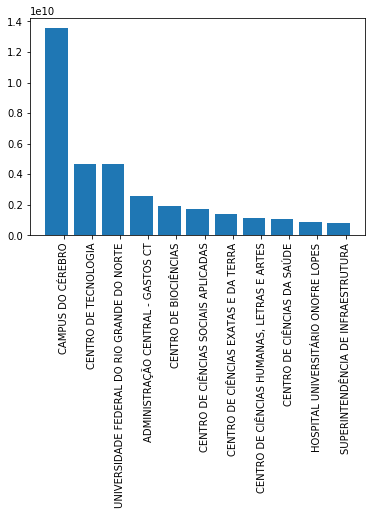

In [76]:
fig, ax = plt.subplots()
bar_positions = np.arange(len(names)) + 0.75
xtick_pos = np.arange(len(names)) + 1
ax.set_xticks(xtick_pos)
ax.set_xticklabels(names,rotation= 90)
ax.bar(bar_positions, top11.values())
plt.show()

In [57]:
import operator
top5.items()
sorted(top5.values())
sorted_top5 = sorted(top5.items(), key=operator.itemgetter(1))
sorted_top5
#sorted(top5.values())

NameError: name 'top5' is not defined

In [79]:
cerebro_list = []
CT_list = []
for idx,rows in df.iterrows():
    if (rows['unidade_responsavel'] == campus_cerebro):
        cerebro_list.append(idx)

# As duas obras (caríssimas por sinal) do campus do cérebro
df.loc[cerebro_list]


,id_obra,descricao,periodo,qtd_dias,status_obra,licitacao,empresa,modalidade,valor,fonte_recurso,vigencia_projeto,projeto,id_unidade_responsavel,unidade_responsavel,Unnamed: 14
37,5803,"execução, pela CONTRATADA, da CONSTRUÇÃO DO CE...",11/06/2010 - 22/12/2013,720,FINALIZADA,10/2009,86.712.247/0001-56 - EDCON - COMÉRCIO E CONST...,CONCORRÊNCIA,"R$ 75.574.557,43",TESOURO - EDUCAÇÃO (112000000),NaN,NaN,5229.0,CAMPUS DO CÉREBRO,NaN
38,5810,CONSTRUÇÃO DA ESCOLA LYGIA MARIA ROCHA LEÃO LA...,14/06/2010 - 31/12/2011,565,FINALIZADA,10/2009,86.712.247/0001-56 - EDCON - COMÉRCIO E CONST...,CONCORRÊNCIA,"R$ 59.817.003,64",NaN,17/12/2007 - 31/07/2013,FUNPEC/UFRN CONV. 147/2007 - CAMPUS DO CEREBRO...,5229.0,CAMPUS DO CÉREBRO,NaN
350,6814,EXECUÇÃO DE SERVIÇOS DE ARQUITETURA VISANDO À ...,09/05/2011 - 09/11/2012,550,CONTRATO FINALIZADO,1/2011,01.641.113/0001-39 - J. GALBINSK & CIA LTDA.,INEXIGIBILIDADE DE LICITAÇÃO,"R$ 35.899,28",NaN,01/01/2000 - 31/12/2015,MANUTENCAO II (1512001),5229.0,CAMPUS DO CÉREBRO,NaN


In [83]:
cc_describe = df.loc[cerebro_list]
print(cc_describe.iloc[0]['descricao'])
print(cc_describe.iloc[1]['descricao'])

execução, pela CONTRATADA, da CONSTRUÇÃO DO CENTRO DE PESQUISAS, LOCALIZADO NO CAMPUS DO CÉREBRO NA ESCOLA AGRÍCOLA DE JUNDIAÍ - MUNICÍPIO DE MACAÍBA / RN: conforme especificações, anexas a CONCORRÊNCIA Nº 10/2009-DMP.
	Unidade 01 - CONSTRUÇÃO DA ESCOLA LYGIA MARIA ROCHA LEÃO LAPORTA
	 Unidade 02 -  CONSTRUÇÃO DO CENTRO DE PESQUISAS


CONSTRUÇÃO DA ESCOLA LYGIA MARIA ROCHA LEÃO LAPORTA, LOCALIZADO NO CAMPUS DO CÉREBRO NA ESCOLA AGRÍCOLA DE JUNDIAÍ - MUNICÍPIO DE MACAÍBA/RN.
